In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#### 1. (2) Найдите точку поломки, размерность Вапника-Червоненкиса и функцию роста для классификаторов:
\begin{cases} 
h(x)= +1, \text{if } x≥a \\
h(x)= +1, \text{if } a≥x≥b
\end{cases}

blah


#### 2. (4) Найдите разделяющую прямую с помощью алгоритма перцептрона с карманом для датасета blobs2.csv, найдите получившуюся точность и визуализируйте результат.


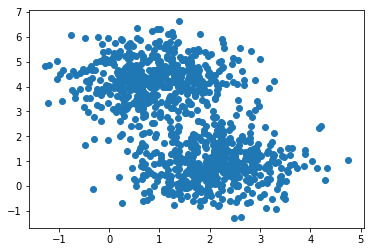

In [96]:
data = pd.read_csv("../data/blobs2.csv")
X, y = data.drop("label", axis=1).values, 2 * data["label"].values - 1
X_ = np.c_[np.ones(X.shape[0]), X]

plt.scatter(X[:,0], X[:,1])
plt.show()

In [97]:
def perceptron(X, y):
    w_best = None
    accuracy_best = -np.inf
    w = np.random.rand(X.shape[1])
    
    for i in range(X.shape[0]):
        h = np.sign(np.sum(np.tile(w, (X.shape[0], 1)) * X, axis=1))
        f = (h != y).argmax()
        accuracy = accuracy_score(y, h)
        w += y[f]*X[f]
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            w_best = w
    print(f"Accuracy: {accuracy_best}")
    
    return w_best        


Accuracy: 0.985


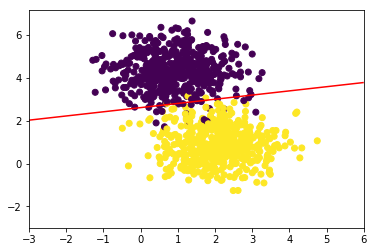

In [98]:
w = perceptron(X_, y)
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
Xm, Ym = np.meshgrid(np.linspace(-3, 6, 10), np.linspace(-3, 6, 10))
Z = (w[0] + w[1]*Xm + w[2]*Ym)
plt.contour(Xm, Ym, Z, [0], colors='red')
plt.show()


#### 3. (4) Добавьте полиномиальные признаки второй степени (x^2,y^2,xy) в датасет blobs2.csv, с помощью алгоритма перцептрона с карманом найдите разделяющую гиперплоскость и визуализируйте результат в виде кривой в исходном пространстве. Сделайте то же самое с полиномиальными признаками третьей и четвертой степени.
##### 2 степень 

Accuracy: 0.986


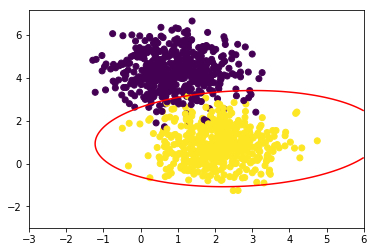

In [99]:
X_ = np.c_[np.ones(X.shape[0]), X]
X_ = np.c_[X_, X_[:,1]**2, X_[:,2]**2, X_[:,1] * X_[:,2]]

w = perceptron(X_, y)

plt.scatter(X[:,0], X[:,1], c=y.astype(float))
Xm, Ym = np.meshgrid(np.linspace(-3, 6, 100), np.linspace(-3, 6, 100))
Z = (w[0] + w[1]*Xm + w[2]*Ym + w[3]*Xm**2 + w[4]*Ym**2 + w[5]*Xm*Ym)
plt.contour(Xm, Ym, Z, [0], colors='r')
plt.show()


##### 3 степень

Accuracy: 0.986


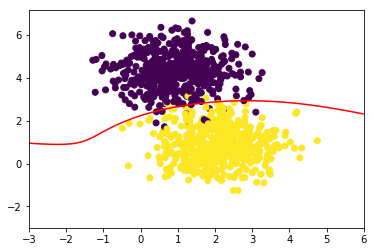

In [100]:
X_ = np.c_[np.ones(X.shape[0]), X]
X_ = np.c_[X_, \
           X_[:,1]**2, \
           X_[:,2]**2, \
           X_[:,1] * X_[:,2], \
           X_[:,1]**2 * X_[:,2], \
           X_[:,1] * X_[:,2]**2, \
           X_[:,1]**3, \
           X_[:,2]**3]

w = perceptron(X_, y)

plt.scatter(X[:,0], X[:,1], c=y.astype(float))
Xm, Ym = np.meshgrid(np.linspace(-3, 6, 100), np.linspace(-3, 6, 100))
Z = w[0] + \
    w[1]*Xm + \
    w[2]*Ym + \
    w[3]*Xm**2 + \
    w[4]*Ym**2 + \
    w[5]*Xm * Ym + \
    w[6]*Xm**2 * Ym + \
    w[7]*Xm * Ym**2 + \
    w[8]*Xm**3 + \
    w[9]*Ym**3
plt.contour(Xm, Ym, Z, [0], colors='r')
plt.show()


##### 4 степень

Accuracy: 0.985


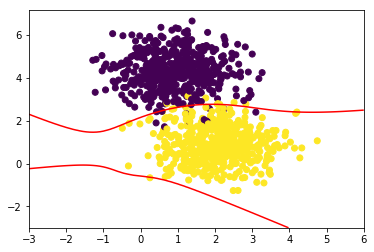

In [101]:
X_ = np.c_[np.ones(X.shape[0]), X]
X_ = np.c_[X_, \
           X_[:,1]**2, \
           X_[:,2]**2, \
           X_[:,1] * X_[:,2], \
           X_[:,1]**2 * X_[:,2], \
           X_[:,1] * X_[:,2]**2, \
           X_[:,1]**3, \
           X_[:,2]**3, \
           X_[:,2] * X_[:,1]**3, \
           X_[:,1] * X_[:,2]**3, \
           X_[:,1]**2 * X_[:,2]**2, \
           X_[:,1]**4, \
           X_[:,2]**4]

w = perceptron(X_, y)
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
Xm, Ym = np.meshgrid(np.linspace(-3, 6, 100), np.linspace(-3, 6, 100))
Z = w[0] + \
    w[1] *Xm + \
    w[2] *Ym + \
    w[3] *Xm**2 + \
    w[4] *Ym**2 + \
    w[5] *Xm * Ym + \
    w[6] *Xm**2 * Ym + \
    w[7] *Xm * Ym**2 + \
    w[8] *Xm**3 + \
    w[9] *Ym**3 + \
    w[10]*Ym * Xm**3 + \
    w[11]*Xm * Ym**3 + \
    w[12]*Xm**2 * Ym**2 + \
    w[13]*Xm**4 + \
    w[14]*Ym**4

plt.contour(Xm, Ym, Z, [0], colors='r')
plt.show()